# Preliminary EDA - Business Dataset

TO DO:
    
emma - filter by is open, is rest. (done -- use open_restaurants df, will work on the filtering for is_restaurant more though to make sure we aren't excluding any)<br> 
Julia - expand attributes &  categories, <br>
no hours,address, name for training -- more for final result

## Import Dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# import the data (chunksize returns jsonReader for iteration)

# TODO: change the file/folder below for the json once in github !!
businesses = pd.read_json('yelp_academic_dataset_business.json', lines=True)

In [3]:
def basic_details(df):
    print('Row:{}, columns:{}'.format(df.shape[0],df.shape[1]))
    k = pd.DataFrame()
    #k['number of Unique value'] = df.nunique()
    k['Number of missing value'] = df.isnull().sum()
    k['Data type'] = df.dtypes
    return k

## Initial Perusal of Business Dataset

In [4]:
basic_details(businesses)

Row:150346, columns:14


,Number of missing value,Data type
business_id,0,object
name,0,object
address,0,object
city,0,object
state,0,object
postal_code,0,object
latitude,0,float64
longitude,0,float64
stars,0,float64
review_count,0,int64


In [5]:
businesses[['city','state']].value_counts()[:20]

city              state
Philadelphia      PA       14567
Tucson            AZ        9249
Tampa             FL        9048
Indianapolis      IN        7540
Nashville         TN        6968
New Orleans       LA        6208
Reno              NV        5932
Edmonton          AB        5054
Saint Louis       MO        4827
Santa Barbara     CA        3829
Boise             ID        2937
Clearwater        FL        2221
Saint Petersburg  FL        1663
Metairie          LA        1643
Sparks            NV        1623
Wilmington        DE        1445
Franklin          TN        1410
St. Louis         MO        1254
St. Petersburg    FL        1185
Meridian          ID        1042
dtype: int64

<AxesSubplot:xlabel='name'>

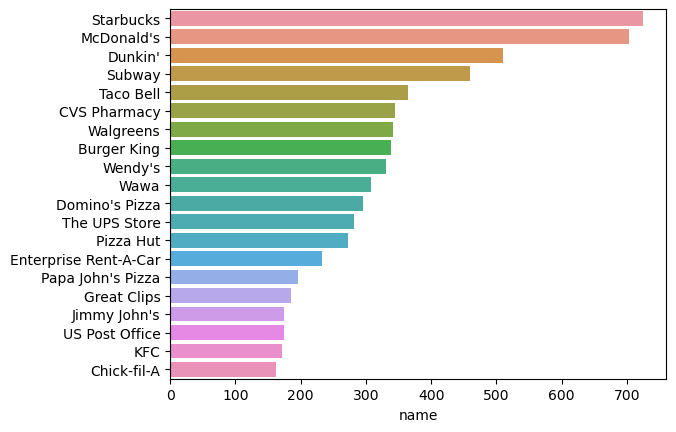

In [6]:
# top 20 common restaurants:
cnt = businesses['name'].value_counts()[:20].to_frame()
sns.barplot(x = cnt['name'], y = cnt.index)

<AxesSubplot:xlabel='categories'>

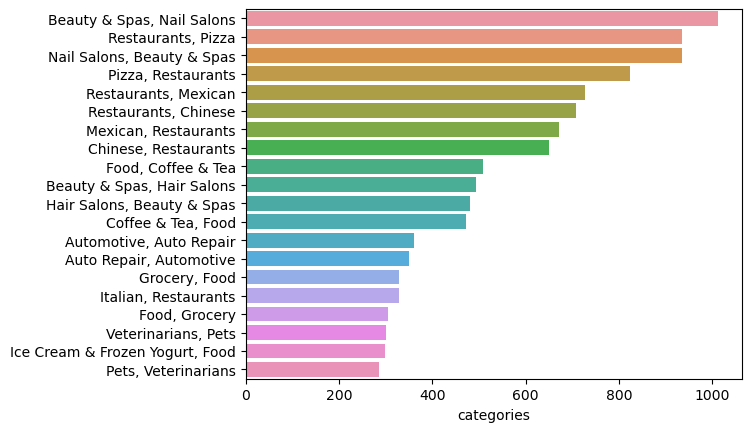

In [7]:
#top 20 common categories
cnt = businesses['categories'].value_counts()[:20].to_frame()
sns.barplot(x = cnt['categories'], y = cnt.index)

In [8]:
#find only restaurant categories -- may need to check if other keywords besides 'Restaurants'
def restaurant(row):
    if row['categories']:
        if 'Restaurants' in row['categories']:
            return 1
        else:
            return 0
    return 0

businesses['is_restaurant'] = businesses.apply(restaurant, axis = 1)
businesses.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,is_restaurant
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",0
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",1
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",0


In [9]:
open_restaurants = businesses[(businesses['is_restaurant'] == 1) & (businesses['is_open'] == 1)]

In [10]:
basic_details(open_restaurants)

Row:34987, columns:15


,Number of missing value,Data type
business_id,0,object
name,0,object
address,0,object
city,0,object
state,0,object
postal_code,0,object
latitude,0,float64
longitude,0,float64
stars,0,float64
review_count,0,int64


In [11]:
open_restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,is_restaurant
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",1
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",1
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...",1
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",1
12,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,1,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",1


In [12]:
open_restaurants['attributes']

3         {'RestaurantsDelivery': 'False', 'OutdoorSeati...
5         {'BusinessParking': 'None', 'BusinessAcceptsCr...
9         {'RestaurantsAttire': ''casual'', 'Restaurants...
11        {'Alcohol': ''none'', 'OutdoorSeating': 'None'...
12        {'RestaurantsReservations': 'False', 'Restaura...
                                ...                        
150323    {'BikeParking': 'True', 'Alcohol': 'u'full_bar...
150325    {'BikeParking': 'True', 'BusinessAcceptsCredit...
150327    {'WiFi': ''free'', 'RestaurantsGoodForGroups':...
150336    {'WheelchairAccessible': 'False', 'Restaurants...
150339    {'RestaurantsDelivery': 'False', 'BusinessAcce...
Name: attributes, Length: 34987, dtype: object

<AxesSubplot:xlabel='categories'>

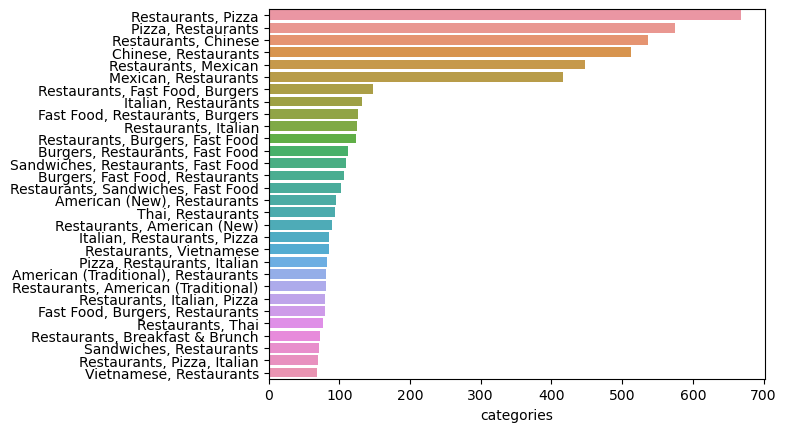

In [13]:
#top 20 common categories
cnt = open_restaurants['categories'].value_counts()[:30].to_frame()
sns.barplot(x = cnt['categories'], y = cnt.index)

In [14]:
unique_set = set([word.strip() for word in ','.join(open_restaurants['categories'].to_list()).split(',')])
unique_cats = list(unique_set)

In [15]:
###### valid_cats = []

In [16]:
# start = 'Sports Clubs'\
start = unique_cats[0]
for cat in unique_cats[unique_cats.index(start):]: 
    valid = input(cat+ " is rest cat: ")
    if valid in ["y", "yes", "Y", "Yes", "t" ,"true", 'T', 'True']:
        valid_cats.append(cat)
    elif valid == "STOP": 
        print("\nSTOPPED at: "+ cat)
        break

KeyboardInterrupt: Interrupted by user

In [ ]:
valid_set = set(valid_cats)
invalid_set = unique_set.difference(valid_set)

In [ ]:
for item in sorted(valid_cats):
    print(item)

In [ ]:
for item in sorted(invalid_set):
    print(item)

## RUN THESE IF YOU HAVEN'T RUN THE INITIAL PERUSAL CELLS

In [17]:
def restaurant(row):
    if row['categories']:
        if 'Restaurants' in row['categories']:
            return 1
    return 0

businesses['is_restaurant'] = businesses.apply(restaurant, axis = 1)
open_restaurants = businesses[(businesses['is_restaurant'] == 1) & (businesses['is_open'] == 1)]

In [18]:
with open("valid_cats.txt", "r") as f:
    valid_cats = f.read()
    valid_cats = valid_cats.split("\n")

## Explode Categories

In [19]:
new_cols = [open_restaurants]
for cat in valid_cats:
    new_cols.append((1*open_restaurants['categories'].str.contains(cat, regex = False)).rename(cat))
open_restaurants_exploded = pd.concat(new_cols, axis = 1)
#open_restaurants_exploded.drop(['categories'], axis = 1, inplace = True)

# Remove rows that dont have any of the valid tags? 
print(f"Num rows before: {open_restaurants_exploded.shape[0]}")
open_restaurants_clean = open_restaurants_exploded[open_restaurants_exploded[valid_cats].sum(axis=1) != 0]
print(f"Num rows cleaned: {open_restaurants_clean.shape[0]}")

Num rows before: 34987
Num rows cleaned: 34853


## Look at exploded data

In [20]:
basic_details(open_restaurants_clean)

Row:34853, columns:290


,Number of missing value,Data type
business_id,0,object
name,0,object
address,0,object
city,0,object
state,0,object
...,...,...
Wine Tasting Classes,0,int64
Wine Tasting Room,0,int64
Wine Tours,0,int64
Wineries,0,int64


<AxesSubplot:>

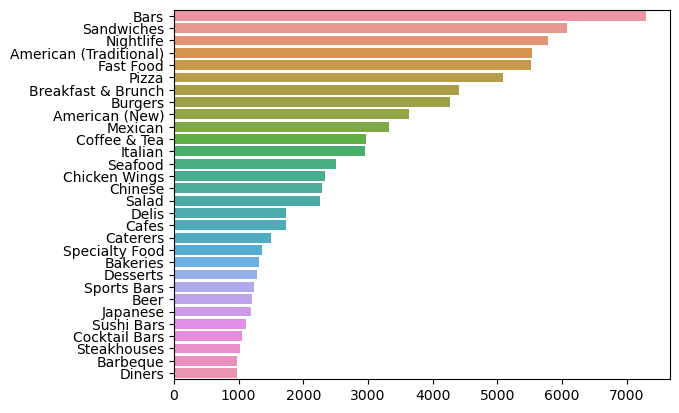

In [21]:
cnt = open_restaurants_clean[valid_cats].sum(numeric_only=None).sort_values(ascending = False)[:30]
sns.barplot(x = cnt.values, y = cnt.index)

## Condense our categories

In [22]:
# Remove rows that dont have any of the valid categories and only keep top 30 categories
print(f"Shape  before: {open_restaurants_clean.shape}")
cnt = open_restaurants_clean[valid_cats].sum(numeric_only=None).sort_values(ascending = False)[:30]
drop_cats = set(valid_cats).difference(cnt.index)
open_restaurants_condensed = open_restaurants_clean[open_restaurants_clean[cnt.index].sum(axis=1) != 0].drop(drop_cats, axis = 1)
print(f"Shape condensed: {open_restaurants_condensed.shape}")

Shape  before: (34853, 290)
Shape condensed: (32380, 45)


## look at condensed

In [23]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(basic_details(open_restaurants_condensed))

Row:32380, columns:45
                        Number of missing value Data type
business_id                                   0    object
name                                          0    object
address                                       0    object
city                                          0    object
state                                         0    object
postal_code                                   0    object
latitude                                      0   float64
longitude                                     0   float64
stars                                         0   float64
review_count                                  0     int64
is_open                                       0     int64
attributes                                  359    object
categories                                    0    object
hours                                      2971    object
is_restaurant                                 0     int64
American (New)                                0   

## Explode Attributes

In [24]:
open_restaurants_condensed = open_restaurants_condensed.join(pd.json_normalize(open_restaurants_condensed['attributes']))
open_restaurants_condensed.drop(['DietaryRestrictions','HairSpecializesIn'], inplace = True, axis = 1)

In [25]:
for col in ['RestaurantsDelivery', 'OutdoorSeating', 'BusinessAcceptsCreditCards', 'BikeParking', 'RestaurantsTakeOut', 'ByAppointmentOnly',
            'Caters', 'RestaurantsReservations','GoodForKids' ,'CoatCheck', 'DogsAllowed','RestaurantsTableService','RestaurantsGoodForGroups',
            'WheelchairAccessible','HasTV','HappyHour','DriveThru', 'BusinessAcceptsBitcoin', 'GoodForDancing', 'BYOB','Corkage',
            'RestaurantsCounterService','Open24Hours','AcceptsInsurance']:
    open_restaurants_condensed[col].replace({'True': 1, 'False': -1, 'None' : 0, np.nan:0}, inplace = True)

In [26]:
## ASSUMPTIONS MADE HERE... sometimes none/nan should not be interpreted as 0, but here we assume so... 

attribute_conversions = {
    'RestaurantsPriceRange2': {'2':2, '1':1, '3':3, '4':4, 'None':np.nan},
    'WiFi': {np.nan:0, "'free'":1, "u'free'":1, "u'no'":0, "u'paid'":-1, "'no'":0, "'paid'":-1, 'None':0},
    'Alcohol': {"'none'":0, "'full_bar'":2, np.nan:0, "u'full_bar'":2, "u'none'":0, "'beer_and_wine'":1, "u'beer_and_wine'":1, 'None':0},
    'RestaurantsAttire': {np.nan:0, "'casual'":1, "u'casual'":1, "u'dressy'":2, "'dressy'":2, "u'formal'":3, 'None':0, "'formal'":3},
    'NoiseLevel': {np.nan:0, "u'average'":0, "u'quiet'":-1, "u'very_loud'":2, "'average'":0, "u'loud'":1, "'quiet'":-1, "'loud'":1, 'None':0, "'very_loud'":2,},
    'Smoking': {np.nan:0, "u'outdoor'":1, "u'no'":2, "u'yes'":-1, "'no'":2},
    'BYOBCorkage':{np.nan:0, "'no'":-1, "'yes_free'":2, 'None':0, "'yes_corkage'":1, "u'no'":-1, "u'yes_free'":2, "u'yes_corkage'":1},
    'AgesAllowed':{np.nan:0, "u'allages'":1, "u'21plus'":2}
}

for col, mapping in attribute_conversions.items():
    open_restaurants_condensed[col].replace(mapping, inplace = True)

In [27]:
for col in ['BusinessParking', 'Ambience', 'GoodForMeal', 'Music', 'BestNights']:
    open_restaurants_condensed[col] = open_restaurants_condensed[col].apply(lambda x: eval(x) if isinstance(x, str) else x)
    df = pd.json_normalize(open_restaurants_condensed[col])
    df.columns = [col+'.'+column for column in df.columns]
    open_restaurants_condensed.drop(col, inplace = True, axis = 1)
    open_restaurants_condensed = open_restaurants_condensed.join(df)
    

## Look at exploded attributes

In [28]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(basic_details(open_restaurants_condensed))

Row:32380, columns:111
                            Number of missing value Data type
business_id                                       0    object
name                                              0    object
address                                           0    object
city                                              0    object
state                                             0    object
postal_code                                       0    object
latitude                                          0   float64
longitude                                         0   float64
stars                                             0   float64
review_count                                      0     int64
is_open                                           0     int64
attributes                                      359    object
categories                                        0    object
hours                                          2971    object
is_restaurant                                  

## Save the ds

In [29]:
open_restaurants_condensed.to_csv('business_data.csv',index=False)

## OPEN QUESTIONS

In [30]:
### Questions about data 
## Remove restaurants with less reviews? or just remove review_coubnt as column??
## Remove sparse attributes?
## Sparse categories were removed, but should we find another way to consolidate?
## data is fairly high dimensional...

In [31]:
sum(open_restaurants_condensed['review_count'] > 100)

8583

In [32]:
open_restaurants_condensed.groupby('city').sum().sort_values('review_count',ascending = False)[0:30][['review_count']]

,review_count
city,
Philadelphia,462248
New Orleans,358253
Nashville,248758
Tampa,220964
Tucson,180893
Indianapolis,173564
Reno,135908
Santa Barbara,121805
Saint Louis,115274


In [33]:
open_restaurants_condensed.columns[0:30]

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'is_restaurant', 'American (New)',
       'American (Traditional)', 'Bakeries', 'Barbeque', 'Bars', 'Beer',
       'Breakfast & Brunch', 'Burgers', 'Cafes', 'Caterers', 'Chicken Wings',
       'Chinese', 'Cocktail Bars', 'Coffee & Tea', 'Delis'],
      dtype='object')

# starting emmas work below 

## Group categories:

In [34]:

'''Depending on the category of the specific row, the row will be grouped into one of the 16 general categories below
    cat_type: the category we want to create a new column for (must be one of the 16)
    this function will return 1 if it belongs in cat_type, otherwise 0'''
def group(row,cat_type):
    if cat_type == 'American':
        possible = ['American (New)', 'American (Traditional)','Steakhouses','Tex-Mex','Supper Clubs','Buffets','Burgers','Cheesesteaks','Canadian (New)','Delicatessen','Delis','Diners','Dinner Theater','Comfort Food','Chicken Wings','Cajun/Creole','Barbeque','Fast Food'
                    ,'Local Flavor','Pancakes','Pretzels','Sandwiches','Soul Food','Poutineries','Southern','Steakhouses','Smokehouse','Soup','Australian']
    if cat_type == 'Dessert':
        possible = ['Bakeries','Chocolatiers & Shops','Creperies','Cupcakes','Custom Cakes','Desserts','Donuts','Fondue','Gelato','Ice Cream & Frozen Yogurt'
                    ,'Patisserie/Cake Shop','Shaved Ice','Shaved Snow','Waffles','Macarons']
    if cat_type == 'Bar':
        possible = [ 'Bar Crawl','Bars','Bartenders','Brewpubs','Champagne Bars','Cideries','Cocktail Bars','Dive Bars'
                    ,'Drive-Thru Bars','Gay Bars','Hookah Bars','Nightlife','Pubs','Social Clubs','Sports Bars'
                        ,'Sports Clubs','Tapas Bars','Tiki Bars','Whiskey Bars','Speakeasies','Jazz & Blues','Karaoke','Gastropubs','Irish Pub']
    if cat_type == 'Beer,Wine,Spirits':
        possible = ['Beer','Beer Bar','Beer Gardens','Breweries','Wine & Spirits','Wine Bars','Wine Tasting Classes','Wine Tasting Room','Wine Tours','Wineries','Distilleries','Paint & Sip','Beverage Store']
    if cat_type == 'Breakfast':
        possible = ['Bed & Breakfast','Breakfast & Brunch','Bagels','Diners']
    if cat_type == 'Coffee & Tea':
        possible = ['Cafes','Coffee & Tea','Coffee & Tea Supplies','Coffee Roasteries','Coffeeshops','Bubble Tea','Tea Rooms','Themed Cafes']
    if cat_type == 'Asian':
        possible = ['Tonkatsu','Teppanyaki','Sushi Bars','Ramen','Izakaya','Japanese','Japanese Curry','Donburi','Conveyor Belt Sushi','Cantonese','Chinese'
                    ,'Dim Sum','Fuzhou','Hainan','Hakka','Hong Kong Style Cafe','Shanghainese','Szechuan','Taiwanese','Asian Fusion','Dumplings','Filipino','Indonesian','Korean','Noodles','Pan Asian','Singaporean','Thai','Vietnamese','Hot Pot','Poke']
    if cat_type == 'Italian':
        possible = ['Italian','Cucina campana','Pasta Shops','Pizza','Sicilian','Sardinian','Tuscan','Calabrian']
    if cat_type == 'Healthy,Specialty Food':
        possible = ['Acai Bowls','Fruits & Veggies','Gluten-Free','Health Markets','Juice Bars & Smoothies','Kombucha'
                        ,'Kosher','Organic Stores','Salad','Specialty Food','Vegan','Vegetarian','Wraps']
    if cat_type == 'Latin American':
        possible = ['Argentine','Colombian','Cuban','Dominican','Empanadas','Latin American','Mexican','New Mexican Cuisine','Puerto Rican','Spanish','Tacos','Tapas/Small Plates','Tex-Mex','Venezuelan']
    if cat_type == 'Mediterranean':
        possible = ['Egyptian','Falafel','Greek','Halal','Kebab','Lebanese','Mediterranean','Moroccan','Pita','Portuguese','Turkish','Syrian','Middle Eastern','Israeli']
    if cat_type == 'Western European':
        possible = ['Tapas/Small Plates','Spanish','Portuguese','Bistros','Brasseries','French','Basque','British','Eastern European','Fish & Chips','Gastropubs','Irish','Modern European','Scandinavian','Scottish']
    if cat_type == 'Slavic Food':
        possible = ['Serbo Croatian','Russian' ,'Polish','Croatian','Ukranian','German','Austrian','Czech','Belgian','Hungarian','Iberian']
    if cat_type == 'African':
        possible = ['African','Ethiopian','South African','Somali','South African','Senegalese']
    if cat_type == 'Food Markets/Shops':
        possible = ['Butcher','Cheese Shops','Cultural Center','CSA','Ethical Grocery','Ethnic Grocery','Farmers Market','Grocery','Herbal Shops'
                    ,'Honey','Imported Food','Fruits & Veggies','Caterers','Cafeteria','Chicken Shop','Health Markets','Herbal Shops','Herbs & Spices'
                    ,'Cooking Classes','Do-It-Yourself Food','Ethnic Food ','Ethnic Grocery','Farmers Market','Imported Food','Food Court','Food Delivery Services','Food Stands','Food Tours','Food Trucks','Gluten-Free','Grill Services','Grocery'
                    ,'International Grocery','Kitchen Incubators','Meat Shops','Organic Stores','Pasta Shops','Personal Chefs','Pick Your Own Farms','Pop-Up Restaurants','Pop-up Shops','Popcorn Shops','Street Vendors','Public Markets','Seafood','Seafood Markets']
     
    for thing in possible:
        if thing in row['categories']:
            return 1
    return 0

    
groups = ['American', 'Dessert', 'Bar', 'Beer,Wine,Spirits','Breakfast' ,'Coffee & Tea','Asian','Italian', 'Healthy,Specialty Food', 'Latin American', 'Mediterranean','Western European', 'Slavic Food','African','Food Markets/Shops'] 
for cat in groups:
    print(cat)
    open_restaurants_condensed['is_' + cat] = open_restaurants_condensed.apply(group, cat_type =cat,axis=1)
    

American
Dessert
Bar
Beer,Wine,Spirits
Breakfast
Coffee & Tea
Asian
Italian
Healthy,Specialty Food
Latin American
Mediterranean
Western European
Slavic Food
African
Food Markets/Shops


In [40]:
forJulia = open_restaurants_condensed[['business_id', 'name','address','city','state','latitude','longitude','stars','review_count','categories','is_American',
 'is_Dessert',
 'is_Bar',
 'is_Beer,Wine,Spirits',
 'is_Breakfast',
 'is_Coffee & Tea',
 'is_Asian',
 'is_Italian',
 'is_Healthy,Specialty Food',
 'is_Latin American',
 'is_Mediterranean',
 'is_Western European',
 'is_Slavic Food',
 'is_African','is_Food Markets/Shops']]




In [42]:
forJulia.to_csv('julia_business_data.csv',index=False)

# Clustering by business

In [35]:
X = open_restaurants_condensed[['stars','American (New)',
       'American (Traditional)', 'Bakeries', 'Bars', 'Beer',
       'Breakfast & Brunch', 'Burgers', 'Cafes', 'Caterers', 'Chicken Wings',
       'Chinese', 'Cocktail Bars', 'Coffee & Tea', 'Delis', 'Desserts',
       'Fast Food', 'Italian', 'Japanese', 'Mexican', 'Nightlife', 'Pizza',
        'Salad', 'Sandwiches', 'Seafood', 'Specialty Food',
       'Sports Bars', 'Sushi Bars','is_American', 'is_Dessert', 'is_Bar',
       'is_Beer,Wine,Spirits', 'is_Breakfast', 'is_Coffee & Tea', 'is_Asian', 'is_Italian',
       'is_Healthy,Specialty Food', 'is_Latin American', 'is_Mediterranean',
       'is_Western European', 'is_Slavic Food', 'is_African','is_Food Markets/Shops']] #

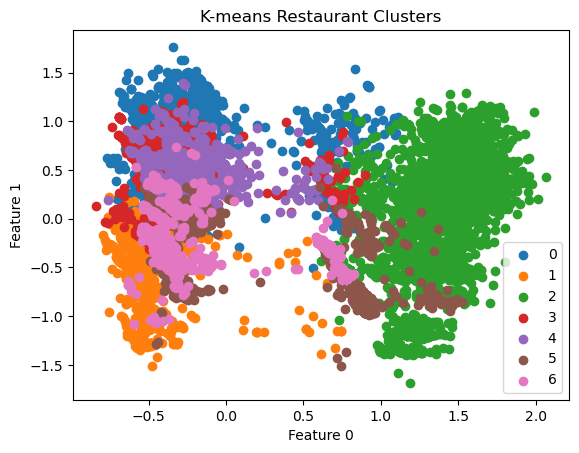

In [78]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

#Scale the data to the range between 0 and 1 before using PCA
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(X)

#Load Data
pca = PCA(n_components = 0.95) # means the explained variance is 95%; usually want between .95-.99

#Transform the data
df = pca.fit_transform(data_rescaled)


kmeans = KMeans(n_clusters=7)
label = kmeans.fit_predict(df)

#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('K-means Restaurant Clusters')
plt.show()


#filter rows of original data
filtered_label0 = df[label == 0]

#plotting the results
#plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
#plt.show()


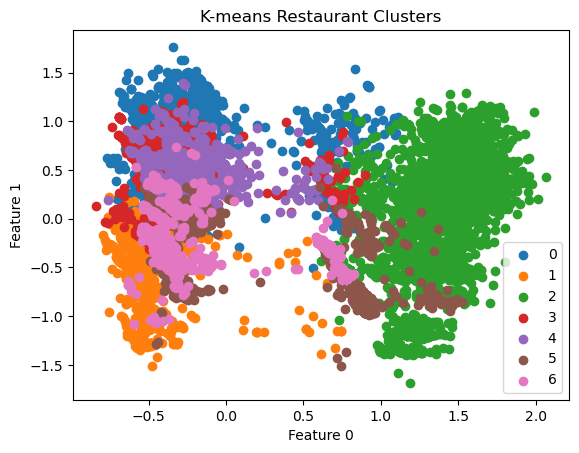

In [88]:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('K-means Restaurant Clusters')
plt.show()

In [89]:
#dstribution of cluster labels:
pd.Series(label).value_counts()

4    6607
2    5874
1    5053
0    3941
6    3789
5    3629
3    3487
dtype: int64

In [90]:
from sklearn import metrics
metrics.silhouette_score(X,label)

0.14106338891224474

In [120]:
def recommend(top_rest, all_rest):
    '''
    top_rest = list of top rated restaurants' business_id
    all_rest = df of restaurants with the clustering labels
    returns df of 50 recommended restaurants that will be passed into the ensemble model
    
    This function finds the top two clusters that the user's reviewed restaurants belong to.
    Then, it sorts the entire dataset of the two respective clusters by their star rating and 
    picks the top 30 from the first cluster and top 20 from the second cluster, while removing any 
    duplicate restaurants. 
    
    '''
    
    #get highest occuring cluster
    topCluster = all_rest[all_rest['business_id'].isin(top_rest)]['label'].value_counts().reset_index().iloc[0][0]
    print(all_rest[all_rest['business_id'].isin(top_rest)]['label'].value_counts())
    
    #get 2nd highest occuring cluster
    secondCluster = all_rest[all_rest['business_id'].isin(top_rest)]['label'].value_counts().reset_index().iloc[1][0]
    
    #get all rest in both cluster labels, sorted by stars
    cluster1 = all_rest[all_rest['label'] == topCluster].sort_values('stars',ascending=False)
    cluster2 = all_rest[all_rest['label'] == secondCluster].sort_values('stars',ascending=False)
    
    #get top 30 for first cluster, top 20 for 2nd cluster
    top30 = cluster1.drop_duplicates('name').head(30)
    second_top20 = cluster2[~cluster2['name'].isin(list(top30['name']))].drop_duplicates('name').head(20)
    
    final50 = pd.concat([top30, second_top20])
    
    return final50
    

In [95]:
#get list of all user files in select_users folder
import glob
path = "../ensemble_users/closest/*.csv"
user_files = []
for fname in glob.glob(path):
    user_files.append(fname)

In [96]:
user_files

["../ensemble_users/closest/user_b'IHNqLX2tHqGzULVYKmpQkw'_50_close.csv",
 "../ensemble_users/closest/user_b'ahnaBpvC29I66u_6JRzQFw'_50_close.csv",
 "../ensemble_users/closest/user_b'6Q8dQGr_DBKcmQ1aXVWvTQ'_50_close.csv",
 "../ensemble_users/closest/user_b'1_JeDgLoAcyBL87FAT4xNA'_50_close.csv",
 "../ensemble_users/closest/user_b'4wFZgzj4DXB3Mn7Q1WLhXg'_50_close.csv"]

In [98]:
import warnings
warnings.filterwarnings("ignore")

In [156]:
### Recommendation + Ranking for ensemble model

#add columns to existing df
all_rest = X
all_rest['label'] = label
all_rest['name'] = open_restaurants_condensed['name']
all_rest['city'] = open_restaurants_condensed['city']
all_rest['address'] = open_restaurants_condensed['address']
all_rest['state'] = open_restaurants_condensed['state']
all_rest['longitude'] = open_restaurants_condensed['longitude']
all_rest['latitude'] = open_restaurants_condensed['latitude']
all_rest['business_id'] =  pd.Series(open_restaurants_condensed['business_id'])

#read in predicted stars csv file
pred_stars = pd.read_csv('business_reviews_predicited_data.csv').rename(columns = {'stars':'avg_stars'})
pred_stars['stars_minus_preds'] = np.abs(pred_stars['stars_minus_preds'])


#create ranking and save csv file of df of recommendations for each user
for userf in user_files:
    user_data = pd.read_csv(userf).rename(columns = {'Unnamed: 0':'business_id'})
    
    #limit dataset to cities user has already been to
    user_cities = np.unique(np.array(user_data['city']))
    city_all_rest = all_rest[all_rest['city'].isin(user_cities)]
    
    #list of user restaurant ids
    top_rest_id = list(user_data['business_id'])
    rec = recommend(top_rest_id, city_all_rest)
    
    final_rec = rec[['business_id','name', 'address','city','state','latitude','longitude','stars']] 
    
    #merged df with pred stars df 
    merged = pd.merge(pred_stars, final_rec, on = 'business_id', how='inner')
    
    #sort merged df by its yelp_stars, then our predicted stars, then the (absolute) distance between avg customer stars and predicted stars
    sorted_merged = merged.sort_values(['stars','preds','stars_minus_preds',], ascending=[False,False,True])
    
    #add ranking column
    sorted_merged['ranking'] = np.linspace(1,len(sorted_merged),len(sorted_merged))
    final = sorted_merged[['business_id','name', 'address','city','state','latitude','longitude','ranking']]
    final.to_csv('final_user_recs/user_BC_rec' + userf[30:],index=True)

2    9
6    9
3    8
4    8
1    6
0    4
5    1
Name: label, dtype: int64
6    12
3    11
5     8
2     4
4     4
1     3
0     2
Name: label, dtype: int64
4    11
1    10
6     9
2     6
5     4
0     4
3     3
Name: label, dtype: int64
6    11
2    10
0     6
1     5
5     5
3     3
4     2
Name: label, dtype: int64
2    13
3    12
6     6
5     4
4     4
0     3
1     3
Name: label, dtype: int64


In [107]:
user_data

,bus_id,name,address,city,state,latitude,longitude,stars,review_count,categories,...,is_Coffee & Tea,is_Asian,is_Italian,"is_Healthy,Specialty Food",is_Latin American,is_Mediterranean,is_Western European,is_Slavic Food,is_African,is_Food Markets/Shops
0,UmXR9Sj0PgYbLgtMjfk9UA,Sea Lect Seafood,300 W Main St,Maple Shade,NJ,39.954587,-75.007017,4.0,50,"Specialty Food, Seafood Markets, Food, Restaur...",...,0,0,0,1,0,0,0,0,0,1
1,IuZcqfpMubJhhtdGc9fXxg,Alden Cafe,302 W Main St,Maple Shade,NJ,39.954635,-75.007148,2.5,23,"Cheesesteaks, Restaurants",...,0,0,0,0,0,0,0,0,0,0
2,-iXlYo2AI1iHgpeZnv5sPw,McDonald's,2428 Kaighns Ave,Cherry Hill,NJ,39.941452,-75.007916,1.5,20,"Burgers, Coffee & Tea, Restaurants, Food, Fast...",...,1,0,0,0,0,0,0,0,0,0
3,DTum3QVjry6POcF3WSZYUQ,Cindy's Chinese Restaurant,2442 Rt 38,Cherry Hill,NJ,39.941522,-75.005938,3.5,33,"Restaurants, Chinese",...,0,1,0,0,0,0,0,0,0,0
4,h-xgk0e_WisVzWLUudKgDg,Crawfish & Pho,"2442 NJ-38, Ste 5",Cherry Hill,NJ,39.941514,-75.005939,4.0,29,"Vietnamese, Seafood, Restaurants",...,0,1,0,0,0,0,0,0,0,1
5,Tj_k9x4px-pzvxQcUp_Nbg,Trappixx Jamaican Restaurant,2442 W Rte 38,Cherry Hill,NJ,39.941551,-75.005718,3.0,55,"Caribbean, Chicken Wings, Herbs & Spices, Spec...",...,0,0,0,1,0,0,0,0,0,1
6,N5yjty7R5XN2_hIwW-2Iyg,Jjang Ga Nae,2431 Church Rd,Cherry Hill,NJ,39.940299,-75.008033,4.0,40,"Korean, Chinese, Restaurants",...,0,1,0,0,0,0,0,0,0,0
7,FJY0EP3DNkrAV2lVpllN4Q,Dunkin',2441 Route 38,Cherry Hill,NJ,39.940689,-75.006209,3.0,10,"Donuts, Coffee & Tea, Restaurants, Food",...,1,0,0,0,0,0,0,0,0,0
8,fio_STCfed6Un1j2DGQpfw,Ruby Buffet,2100 Rt 38,Cherry Hill,NJ,39.941690,-75.017780,2.5,153,"Buffets, Restaurants",...,0,0,0,0,0,0,0,0,0,0
9,3xW7Uk_12K8qSdBctcXySA,Wendy's,2400 Church Rd,Cherry Hill,NJ,39.939887,-75.009099,2.0,23,"Burgers, Restaurants, Fast Food",...,0,0,0,0,0,0,0,0,0,0
